In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer


/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


    PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

+    month	month of the year: 'jan' to 'dec'
+     day	day of the week: 'mon' to 'sun'
+     FFMC	FFMC index from the FWI system: 18.7 to 96.20
+     DMC	DMC index from the FWI system: 1.1 to 291.3
+     DC	DC index from the FWI system: 7.9 to 860.6
+    ISI	ISI index from the FWI system: 0.0 to 56.10
+     temp	temperature in Celsius degrees: 2.2 to 33.30
+     RH	relative humidity in %: 15.0 to 100
+     wind	wind speed in km/h: 0.40 to 9.40
+     rain	outside rain in mm/m2 : 0.0 to 6.4
+     Size_Categorie 	the burned area of the forest ( Small , Large)

In [2]:
df=pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.drop(['month','day'],axis=1,inplace=True)

In [4]:
df.shape

(517, 29)

In [5]:
df.drop_duplicates(keep='first',inplace=True)

In [6]:
df.shape

(509, 29)

In [7]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           509 non-null    float64
 1   DMC            509 non-null    float64
 2   DC             509 non-null    float64
 3   ISI            509 non-null    float64
 4   temp           509 non-null    float64
 5   RH             509 non-null    int64  
 6   wind           509 non-null    float64
 7   rain           509 non-null    float64
 8   area           509 non-null    float64
 9   dayfri         509 non-null    int64  
 10  daymon         509 non-null    int64  
 11  daysat         509 non-null    int64  
 12  daysun         509 non-null    int64  
 13  daythu         509 non-null    int64  
 14  daytue         509 non-null    int64  
 15  daywed         509 non-null    int64  
 16  monthapr       509 non-null    int64  
 17  monthaug       509 non-null    int64  
 18  monthdec  

In [9]:
# Label Encoding size_category column

from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
df['size_category']=encoder.fit_transform(df['size_category'])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [10]:
df['size_category'].value_counts()

1    371
0    138
Name: size_category, dtype: int64

In [11]:
## Splitting into X and Y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

### Standardizing continuous columns using Column Transformer

In [12]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

t=[('num',StandardScaler(),['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])]
transformer=ColumnTransformer(transformers=t,remainder='passthrough')

# fit training data
X=transformer.fit_transform(X)



In [13]:
X

array([[-0.79603981, -1.31838569, -1.82893094, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00325666, -1.1740525 ,  0.48925693, ...,  0.        ,
         1.        ,  0.        ],
       [-0.00325666, -1.04383887,  0.56104493, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.62485856, -0.8398898 ,  0.47514131, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.68141971,  0.56108339,  0.26985988, ...,  0.        ,
         0.        ,  0.        ],
       [-2.00323234, -1.68235633, -1.77892132, ...,  1.        ,
         0.        ,  0.        ]])

In [14]:
# Splitting into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)


In [15]:
X_train

array([[ 0.33908153,  0.18456204,  0.97564081, ...,  0.        ,
         0.        ,  1.        ],
       [-4.88608018, -0.61868351,  0.4739314 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14088574,  0.50460519,  0.21622053, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.8075443 ,  0.48734796,  0.23396588, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.51925952,  0.61285507,  0.72922244, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26701033,  0.66462676,  0.44529686, ...,  0.        ,
         0.        ,  0.        ]])

In [16]:
y_train.value_counts()

1    262
0     94
Name: size_category, dtype: int64

In [17]:
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (356, 28)
Shape of testing data (153, 28)


### Building Neural Network base model

In [18]:
model = Sequential()
model.add(Dense(30, input_dim=28,kernel_initializer='uniform', activation='relu'))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))



2022-11-27 06:06:31.397958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
import pydot
import keras
from keras.utils.vis_utils import plot_model
keras.utils.vis_utils.pydot = pydot

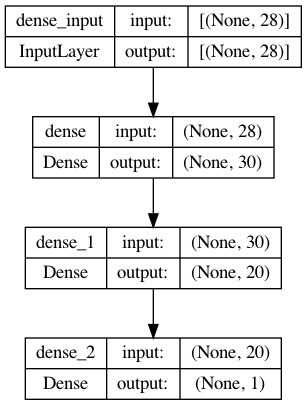

In [20]:
# Visualizing the neural network
plot_model(model,to_file='model_plot.png',show_shapes=True, show_layer_names=True)

In [21]:
# Summary of neural network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                870       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,511
Trainable params: 1,511
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Assigning weights as it is an imbalanced dataset
weights={0:1,1:1}

In [24]:
# Training and evaluating the model
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),class_weight=weights, epochs =100, batch_size=10)

Epoch 1/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.7275 - val_loss: 0.6780 - val_accuracy: 0.7124
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.7360 - val_loss: 0.6196 - val_accuracy: 0.7124
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7360 - val_loss: 0.5896 - val_accuracy: 0.7124
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5259 - accuracy: 0.7360 - val_loss: 0.5744 - val_accuracy: 0.7124
Epoch 5/100
36/36 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7388 - val_loss: 0.5582 - val_accuracy: 0.7124
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7640 - val_loss: 0.5453 - val_accuracy: 0.7320
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4680 - accuracy: 0.7697 - val_loss: 0.5239 - val_accuracy: 0.7516
Epoch 8/100
3

Epoch 59/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9972 - val_loss: 0.1276 - val_accuracy: 0.9542
Epoch 60/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9972 - val_loss: 0.1175 - val_accuracy: 0.9608
Epoch 61/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.1426 - val_accuracy: 0.9608
Epoch 62/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.1191 - val_accuracy: 0.9542
Epoch 63/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9972 - val_loss: 0.1187 - val_accuracy: 0.9477
Epoch 64/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 0.9542
Epoch 65/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0150 - accuracy: 0.9972 - val_loss: 0.1353 - val_accuracy: 0.9542
Epoch 

In [25]:
# evaluate the model
_,train_accuracy = model.evaluate(X_train,y_train, verbose=0)
_,test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Training  accuracy: %.3f, Testing  accuracy: %.3f' % (train_accuracy, test_accuracy))

Training  accuracy: 1.000, Testing  accuracy: 0.961


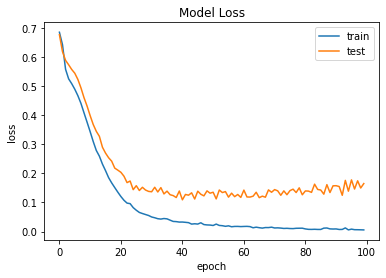

In [26]:
# plot loss during training
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

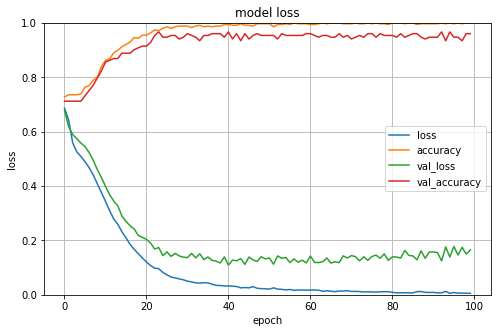

In [27]:
## Plotting the learning curves

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [28]:
# Making predictions

#y_pred_test = model.predict(X_test)


T=0.5
predict = model.predict(X_test)
y_pred = predict>=T

5/5 [==============================] - 0s 732us/step


In [29]:
T=0.5
predict1 = model.predict(X_train)
y_pred_train = predict1>=T


12/12 [==============================] - 0s 502us/step


In [30]:
y_pred_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [

In [31]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [32]:
from sklearn.metrics import confusion_matrix

conf1=confusion_matrix(y_pred,y_test)
conf1

array([[ 39,   1],
       [  5, 108]])

In [33]:
conf2=confusion_matrix(y_pred_train,y_train)
conf2

array([[ 94,   0],
       [  0, 262]])

In [34]:
# Classification report

from sklearn.metrics import classification_report

names=['0-large fire','1-small fire']
print(classification_report(y_test, y_pred,target_names=names,zero_division=1))

              precision    recall  f1-score   support

0-large fire       0.97      0.89      0.93        44
1-small fire       0.96      0.99      0.97       109

    accuracy                           0.96       153
   macro avg       0.97      0.94      0.95       153
weighted avg       0.96      0.96      0.96       153



## Hyperparameter Tuning using RandomizedSearchCV

In [35]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [36]:
from keras.optimizers import Adam

In [37]:
from keras.wrappers.scikit_learn import KerasClassifier


In [38]:
# Building a keras classification model

def create_keras_model(learning_rate,activation_function,init,neuron1,neuron2):
    
    model = Sequential()
    
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
 
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))

    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model



In [39]:
# Wrapping the keras model in a object

keras_clf = KerasClassifier(build_fn = create_keras_model,verbose = 0)

/var/folders/2q/mbjnnv1x4x701wdq7m9tmg3m0000gn/T/ipykernel_94430/1397449910.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_fn = create_keras_model,verbose = 0)


In [40]:
# Define the search parameters

batch_size = [10,20,30,40,50]
epochs = [25,50,100]
learning_rate = [0.001,0.01,0.1]

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [10,20,30]
neuron2 = [2,4,6,8]


# Create a dictionary of the parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = keras_clf,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(X_train,y_train)




Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detect

/Users/ayaskantsamal/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [41]:
# Summarize the results
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)


Best score: 0.9465962409973144
Best parameters: {'neuron2': 8, 'neuron1': 20, 'learning_rate': 0.01, 'init': 'uniform', 'epochs': 50, 'batch_size': 40, 'activation_function': 'linear'}


In [42]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= random_result.best_params_

keras_tuned=create_keras_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

# Training and evaluating the model
history2=keras_tuned.fit(X_train, y_train, validation_data=(X_test,y_test),class_weight=weights,
                         epochs =d1['epochs'], batch_size=d1['batch_size'])

Epoch 1/50
9/9 [==============================] - 0s 13ms/step - loss: 0.6337 - accuracy: 0.7331 - val_loss: 0.5862 - val_accuracy: 0.7124
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7584 - val_loss: 0.5665 - val_accuracy: 0.7255
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.7837 - val_loss: 0.4996 - val_accuracy: 0.7843
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.8343 - val_loss: 0.4773 - val_accuracy: 0.8235
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8624 - val_loss: 0.3673 - val_accuracy: 0.8627
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.8820 - val_loss: 0.3208 - val_accuracy: 0.8758
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9157 - val_loss: 0.3156 - val_accuracy: 0.9085
Epoch 8/50
9/9 [=================

In [43]:
# evaluate the model
_,train_accuracy_tuned = keras_tuned.evaluate(X_train,y_train, verbose=0)
_,test_accuracy_tuned = keras_tuned.evaluate(X_test, y_test, verbose=0)

print('Training set accuracy: %.3f, Testing set accuracy: %.3f' % (train_accuracy_tuned, test_accuracy_tuned))

Training set accuracy: 0.997, Testing set accuracy: 0.974


In [46]:
# Making predictions

T=0.5
predict_f = model.predict(X_test)
y_pred_tuned = predict_f>=T

5/5 [==============================] - 0s 968us/step


### Classification report of tuned model

In [47]:
from sklearn.metrics import classification_report

names=['0-large fire','1-small fire']
print(classification_report(y_test, y_pred_tuned,target_names=names))

              precision    recall  f1-score   support

0-large fire       0.97      0.89      0.93        44
1-small fire       0.96      0.99      0.97       109

    accuracy                           0.96       153
   macro avg       0.97      0.94      0.95       153
weighted avg       0.96      0.96      0.96       153



### Comparing base model and tuned model

In [48]:
result=pd.DataFrame({'models':['base model','tuned model'],'train accuracy':[train_accuracy,train_accuracy_tuned],
                     'test accuracy':[test_accuracy,test_accuracy_tuned]})
result

,models,train accuracy,test accuracy
0,base model,1.000000,0.960784
1,tuned model,0.997191,0.973856


[CV 1/5; 2/10] START activation_function=linear, batch_size=50, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=8
[CV 1/5; 2/10] END activation_function=linear, batch_size=50, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=8;, score=0.722 total time=   2.2s
[CV 4/5; 2/10] START activation_function=linear, batch_size=50, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=8
[CV 4/5; 2/10] END activation_function=linear, batch_size=50, epochs=50, init=zero, learning_rate=0.1, neuron1=10, neuron2=8;, score=0.704 total time=   1.5s
[CV 2/5; 3/10] START activation_function=linear, batch_size=40, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=8
[CV 2/5; 3/10] END activation_function=linear, batch_size=40, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=8;, score=0.676 total time=   2.7s
[CV 2/5; 5/10] START activation_function=relu, batch_size=50, epochs=50, init=normal, learning_rate=0.001, neuron1=20, neuron2=2
[CV 2/5; 5/10]

[CV 3/5; 1/10] START activation_function=tanh, batch_size=10, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=6
[CV 3/5; 1/10] END activation_function=tanh, batch_size=10, epochs=50, init=normal, learning_rate=0.01, neuron1=10, neuron2=6;, score=0.930 total time=   4.6s
[CV 5/5; 3/10] START activation_function=linear, batch_size=40, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=8
[CV 5/5; 3/10] END activation_function=linear, batch_size=40, epochs=100, init=zero, learning_rate=0.1, neuron1=20, neuron2=8;, score=0.831 total time=   2.5s
[CV 5/5; 5/10] START activation_function=relu, batch_size=50, epochs=50, init=normal, learning_rate=0.001, neuron1=20, neuron2=2
[CV 5/5; 5/10] END activation_function=relu, batch_size=50, epochs=50, init=normal, learning_rate=0.001, neuron1=20, neuron2=2;, score=0.831 total time=   1.5s
[CV 3/5; 7/10] START activation_function=tanh, batch_size=10, epochs=25, init=zero, learning_rate=0.1, neuron1=20, neuron2=2
[CV 3/5; 7/1